In [7]:
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
iris=load_iris()

In [14]:
x=iris.data
y=iris.target

In [15]:
X=pd.DataFrame(iris.data)
X.columns=iris.feature_names
y=iris.target

In [16]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
X.shape

(150, 4)

<Axes: >

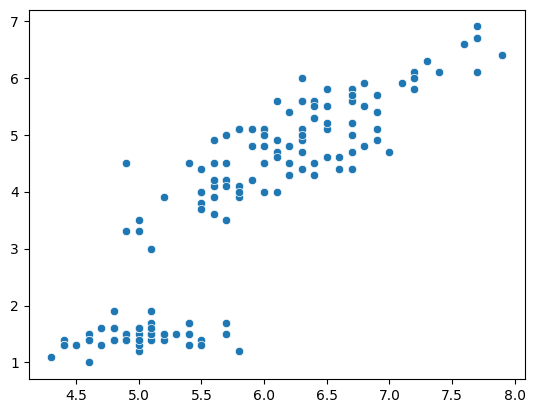

In [21]:
#visualize
sns.scatterplot(x=x[:,0],y=x[:,2])

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [23]:
#optional dimensionality reduction

In [24]:
#Elbow method
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\vkt58\.anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vkt58\.anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vkt58\.anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vkt58\.anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Wi

In [26]:
wcss

[600.0,
 222.36170496502297,
 140.03275277428642,
 114.55684421262914,
 91.64526530586978,
 82.45209444611591,
 72.44102870435051,
 64.60491741148742,
 55.853514282326664,
 51.254288963334]

<Axes: >

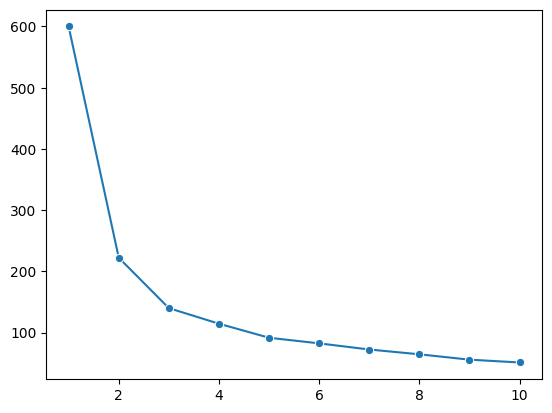

In [28]:
sns.lineplot(x=range(1,11),y=wcss,marker='o')

C:\Users\vkt58\.anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

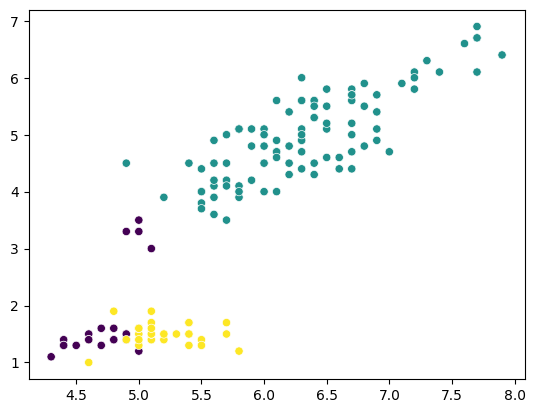

In [30]:
#kmeans
kmeans=KMeans(n_clusters=3)
labels=kmeans.fit_predict(X_scaled)

sns.scatterplot(x=x[:,0],y=x[:,2],c=labels)

In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pca.fit_transform(X_scaled)

In [35]:
#Elbow method
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

C:\Users\vkt58\.anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vkt58\.anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vkt58\.anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\vkt58\.anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Wi

In [36]:
wcss

[574.8792432000093,
 197.40381604541255,
 115.18647050742683,
 90.06894937752084,
 80.88621939050873,
 57.96874903141516,
 49.49868044263288,
 45.10815503771016,
 33.55646560654599,
 28.32183591521881]

<Axes: >

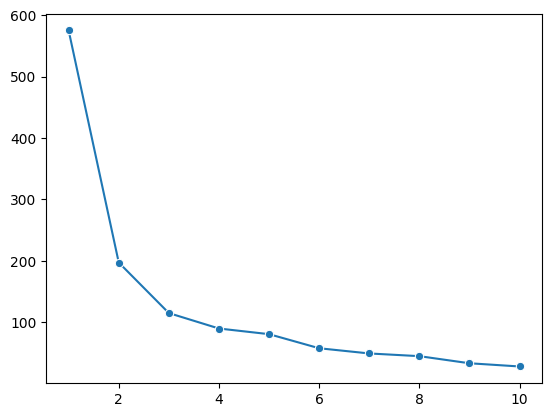

In [37]:
sns.lineplot(x=range(1,11),y=wcss,marker='o')

C:\Users\vkt58\.anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: >

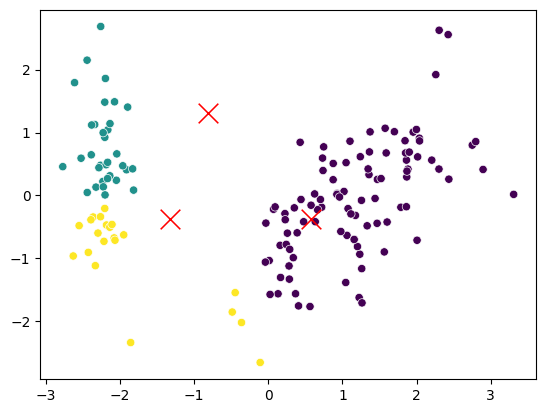

In [48]:
kmeans=KMeans(n_clusters=3,random_state=42)
labels=kmeans.fit_predict(X_scaled)

sns.scatterplot(x=pca_data[:,0],y=pca_data[:,1],c=labels)
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],marker='x',c='red',s=200)